In [29]:
import numpy as np
import matplotlib.pyplot as plt


In [30]:
# load data for half input images
f = open('data.txt')
content = f.read()
f.close()

data = []

for line in content.split('\n'):
    if line != '':
        row = line.split(';')
        data.append(list(map(float, row)))


data = np.asarray(data)

In [31]:
data.shape

(10000, 392)

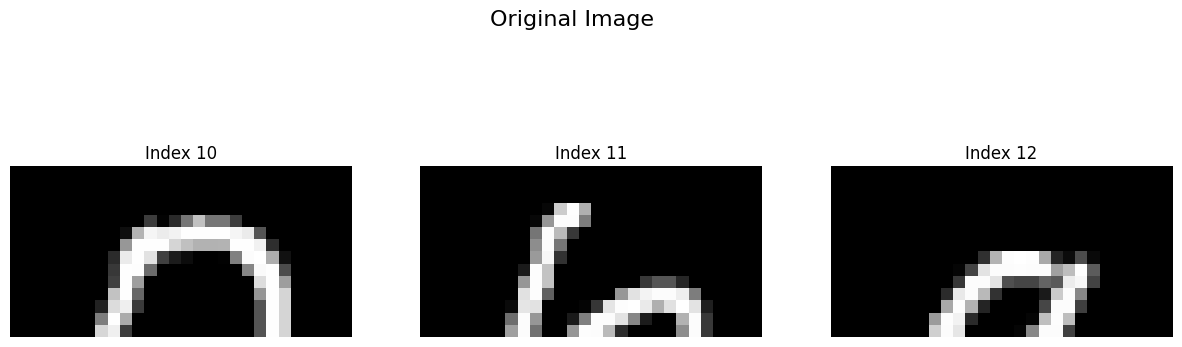

In [32]:
#Set Image to evaluate
indices = [10, 11, 12]
num_indices = len(indices)

# Create subplots for visualization
fig, axes = plt.subplots(1, num_indices, figsize=(15, 5))
if num_indices == 1:
    axes = [axes]

for i, idx in enumerate(indices):
  axes[i].imshow(data[idx,:].reshape(14,28), cmap = 'gray')
  axes[i].set_title(f"Index {idx}")
  axes[i].axis('off')

fig.suptitle("Original Image", fontsize=16)
plt.show()

In [33]:
#load data for half output images
f = open('output_tanh8.txt')
content = f.readlines()[1:]
f.close()

data_sw = []
data_hw = []

for s in content:
  t = s.split(';')
  data_sw.append(float(t[0]))
  data_hw.append(float((t[1].split('\n'))[0]))

data_sw = np.asarray(data_sw)
data_hw = np.asarray(data_hw)


In [34]:
def image_combiner(cut, generated):
  full_image = np.concatenate((cut,generated))
  return full_image

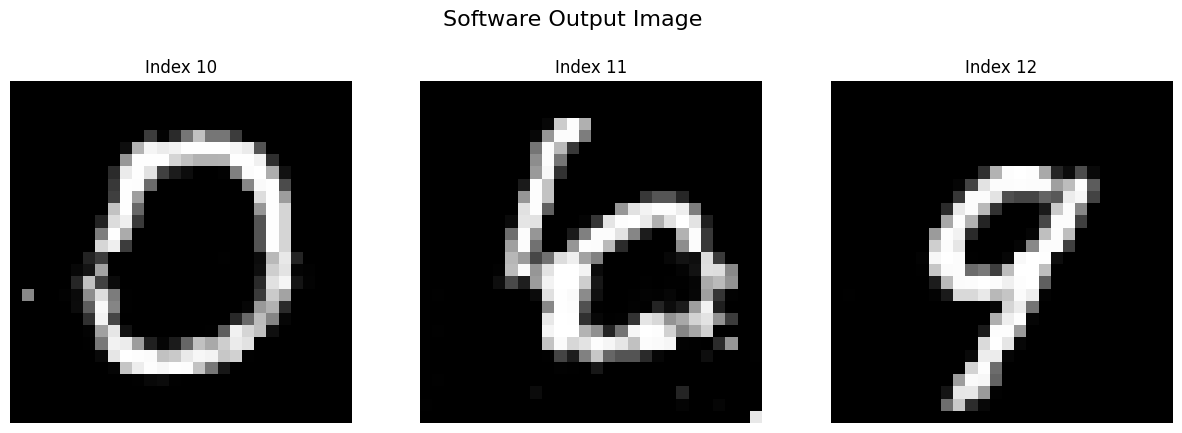

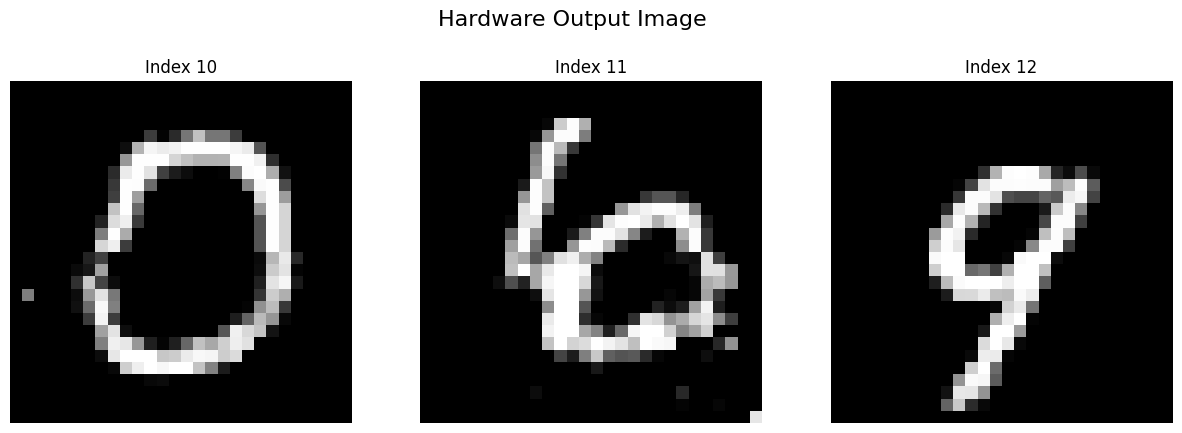

In [35]:
offset = 14*28    # offset for pixels of half image, do not change
output = {}

fig1, ax1 = plt.subplots(1, num_indices, figsize=(15, 5))
fig2, ax2 = plt.subplots(1, num_indices, figsize=(15, 5))
if num_indices == 1:
    ax1 = [ax1]
    ax2 = [ax2]

for i, idx in enumerate(indices):
  # combined image for software output
  output_sw = image_combiner(data[idx,:].reshape(14,28), data_sw[idx*offset:idx*offset+offset].reshape(14,28))

  # combined image for hardware output
  output_hw = image_combiner(data[idx,:].reshape(14,28), data_hw[idx*offset:idx*offset+offset].reshape(14,28))

  ax1[i].imshow(output_sw.reshape((28,28)).astype(np.float32), cmap = 'gray')
  ax1[i].set_title(f"Index {idx}")
  ax1[i].axis('off')

  ax2[i].imshow(output_hw.reshape((28,28)).astype(np.float32), cmap = 'gray')
  ax2[i].set_title(f"Index {idx}")
  ax2[i].axis('off')

  output[idx] = {'software':output_sw, 'hardware':output_hw}

fig1.suptitle("Software Output Image", fontsize=16)
fig2.suptitle("Hardware Output Image", fontsize=16)
plt.show()

In [36]:
# scale images to 0-255
for idx, data in output.items():
  output[idx]['scaled_hardware']=(data['hardware']*127.5 + 127.5).astype(int)
  output[idx]['scaled_software']=(data['software']*127.5 + 127.5).astype(int)

In [37]:
import math

def psnr(img_data1, img_data2):
    mse = np.mean( (img_data1 - img_data2) ** 2 )
    if mse == 0:
      return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

def max_error (img_data1, img_data2):
    return np.max(abs(img_data1-img_data2))

In [38]:
for idx, data in output.items():
  print ("Index: ", idx)
  print ("Max pixel error: ", max_error(output[idx]['scaled_software'], output[idx]['scaled_hardware']))
  print ("Peak Signal-to-Noise Ratio: ", psnr(output[idx]['scaled_software'], output[idx]['scaled_hardware']))

Index:  10
Max pixel error:  16
Peak Signal-to-Noise Ratio:  42.6822168370888
Index:  11
Max pixel error:  17
Peak Signal-to-Noise Ratio:  42.56993337396983
Index:  12
Max pixel error:  13
Peak Signal-to-Noise Ratio:  47.065287020211215
